In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

from keras_training import *
from gspynet import *
#from visualization import *

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
# Loading the TensorBoard notebookextension
%load_ext tensorboard
# Removing previous logs
!rm -rf ./models/

Reading the dataframe:

In [3]:
df = pd.read_pickle('data/lowmass_lowsnr_v3_protocol4.pkl')
df.sample(3)

0.5.png  \
242  [0.14026013, 0.11507005, 0.1297808, 0.11537485...   
634  [0.15014222, 0.19872312, 0.1304801, 0.12864476...   
675  [0.118457, 0.09279196, 0.11119299, 0.15110287,...   

                                               1.0.png  \
242  [0.100400314, 0.13944122, 0.14894053, 0.136988...   
634  [0.12692381, 0.10973632, 0.11128128, 0.0871576...   
675  [0.13011809, 0.11733515, 0.1169749, 0.13382174...   

                                               2.0.png  \
242  [0.082482845, 0.12863357, 0.14469193, 0.140574...   
634  [0.14490451, 0.18047959, 0.15411383, 0.1287801...   
675  [0.12319683, 0.12733811, 0.13961318, 0.1109087...   

                                               4.0.png         gravityspy_id  \
242  [0.107350536, 0.13294892, 0.0972328, 0.1490031...  1260210666.073999882   
634  [0.10596118, 0.113399275, 0.14844434, 0.216414...            QLCR06VDta   
675  [0.13816306, 0.13159105, 0.1452317, 0.13249613...            0050111900   

             true_label              uniqueID               Label  
242  low_frequency_blip  1260210666.073999882  Blip_Low_Frequency  
634           no_glitch            QLCR06VDta           No_Glitch  
675               chirp            0050111900      low_mass_chirp

In [4]:
# Load dataset
images, num_labels, label_list, tags = dataset_creation('data/lowmass_lowsnr_v3_protocol4.pkl')

In [5]:
print('Total number of examples:', len(images))
print('Labels:', label_list)
print('Images shape:', images.shape)
input_shape = (140*2, 170*2, 1) # PyTorch way: (1, 140*2, 170*2)

Total number of examples: 815
Labels: ['blip' 'chirp' 'low_frequency_blip' 'no_glitch' 'scratchy']
Images shape: (815, 280, 340, 1)


In [6]:
# Create CNN
model = GSpyNet2(input_shape, len(label_list)) #GSpyNet2(input_shape, len(dataset.label_map))

Model: "GSpyNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 276, 336, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 138, 168, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 134, 164, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 67, 82, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 78, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 39, 64)       0   

No checkpoints for model "gspynet2_lowmass_lowsnr_v3" found, starting training from scratch.
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.5968 - accuracy: 0.2218
Epoch 1: val_accuracy improved from -inf to 0.21088, saving model to models/gspynet2_lowmass_lowsnr_v3_epoch_0001-val_acc_0.211.hdf5
30/30 [==============================] - 26s 844ms/step - loss: 1.5968 - accuracy: 0.2218 - val_loss: 1.5839 - val_accuracy: 0.2109
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.5577 - accuracy: 0.2611
Epoch 2: val_accuracy improved from 0.21088 to 0.39456, saving model to models/gspynet2_lowmass_lowsnr_v3_epoch_0002-val_acc_0.395.hdf5
30/30 [==============================] - 25s 838ms/step - loss: 1.5577 - accuracy: 0.2611 - val_loss: 1.5355 - val_accuracy: 0.3946
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.4308 - accuracy: 0.4556
Epoch 3: val_accuracy improved from 0.39456 to 0.60544, saving model to models/gspynet2_lowm

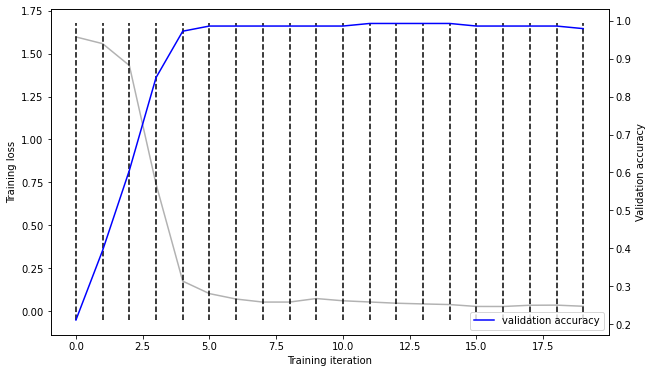

In [7]:
# Train CNN
history = train_model(model, images, num_labels, label_list, epochs=20, save_improved_epoch=True, 
                      train_size=0.9, test_size=0.1,
                      name='gspynet2_lowmass_lowsnr_v3', batch=20, seed=1986)

In [ ]:
%tensorboard --logdir models/logs/fit

## Translated dataset

In [ ]:
dataset2 = GSpyDataset('data/lowmass_lowsnr_translated/lowmass_lowsnr_translated.pkl')
print('Total number of examples:', len(dataset2))
print('Labels:', dataset2.label_map)
input_shape = (1, 140*2, 170*2)

In [ ]:
model2 = GSpyNet2(input_shape, len(dataset2.label_map))
train_model(model2, dataset2, epochs=100, save_every_epoch=10, name='gspynet2_lowmass_lowsnr_translated', batch=20, seed=1986, train_size=0.7, val_size=0.3, test_size=0)

## Test models on test set

In [ ]:
test_dataset = GSpyDataset('data/lowmass_test_set/no_offset_test_set.pkl')
test_model(model, test_dataset, name='gspynet2_lowmass_lowsnr_v3_protocol4', save_dir='data/lowmass_test_set/no_offset')
test_model(model2, test_dataset, name='gspynet2_lowmass_lowsnr_translated', save_dir='data/lowmass_test_set/no_offset')

In [ ]:
test_dataset = GSpyDataset('data/lowmass_test_set/offset_test_set.pkl')
test_model(model, test_dataset, name='gspynet2_lowmass_lowsnr_v3_protocol4', save_dir='data/lowmass_test_set/offset')
test_model(model2, test_dataset, name='gspynet2_lowmass_lowsnr_translated', save_dir='data/lowmass_test_set/offset')

## Confusion matrices

In [ ]:
df1 = pd.read_pickle('data/lowmass_test_set/offset/gspynet2_lowmass_lowsnr_v3_protocol4 _test_results.pkl')
df2 = pd.read_pickle('data/lowmass_test_set/offset/gspynet2_lowmass_lowsnr_translated _test_results.pkl')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,12))
ax1.set_title('Translated test set performance for CNN trained on untranslated dataset')
confusion_matrix(df1, display=True, ax=ax1, colorbar=False)
ax2.set_title('Translated test set performance CNN trained on translated dataset')
confusion_matrix(df2, display=True, ax=ax2, colorbar=False)

In [ ]:
df1 = pd.read_pickle('data/lowmass_test_set/no_offset/gspynet2_lowmass_lowsnr_v3_protocol4 _test_results.pkl')
df2 = pd.read_pickle('data/lowmass_test_set/no_offset/gspynet2_lowmass_lowsnr_translated _test_results.pkl')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,12))
ax1.set_title('Untranslated test set performance for CNN trained on untranslated dataset')
confusion_matrix(df1, display=True, ax=ax1, colorbar=False)
ax2.set_title('Untranslated test set performance CNN trained on translated dataset')
confusion_matrix(df2, display=True, ax=ax2, colorbar=False)

## Saliency maps

In [ ]:
test_dataset = GSpyDataset('data/lowmass_test_set/offset_test_set.pkl')
tags = test_dataset.tags
df1 = pd.read_pickle('data/lowmass_test_set/offset/gspynet2_lowmass_lowsnr_v3_protocol4 _test_results.pkl')
df2 = pd.read_pickle('data/lowmass_test_set/offset/gspynet2_lowmass_lowsnr_translated _test_results.pkl')

model.to('cpu')
model2.to('cpu')
bp1 = Backprop(model)
bp2 = Backprop(model2)

plots = 0
for i, row in tqdm(df1.iterrows()):
    if plots > 5: break
    if row['true_label_number'] != row['model_label_number']:
        idx = np.flatnonzero(tags==row['uniqueID'])[0]
        test = test_dataset[idx]
        test_image = test[0]
        test_class = test[1]
        test_label = test_dataset.label_map[test_class]
        
        ten1, grad1, max_grad1 = bp1.visualize(test_image, test_class, guided=True)
        ten2, grad2, max_grad2 = bp2.visualize(test_image, test_class, guided=True)
        fig, axs = plt.subplots(1,3, figsize=(14,34))
        axs[0].imshow(test_image[0,:,:])
        axs[0].set_title(test_label)
        plot_tensor(axs[1], grad1)
        axs[1].set_title('Untranslated CNN saliency')
        plot_tensor(axs[2], grad2)
        axs[2].set_title('Translated CNN saliency')
        plots += 1